<a href="https://colab.research.google.com/github/VictorFrancheto/Mathematics_and_Machine_Learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
---

Logistic regression is a statistical technique aimed at producing a model from a set of observations to predict values taken by a categorical variable, often binary, based on a series of explanatory variables that can be continuous and (or) binary.

### Some Aplications

Logistic regression is commonly used in a variety of situations where predicting the probability of a binary event based on explanatory variables is desired. Some typical situations include:

**1. Binary Response Modeling:** For example, predicting whether a customer will purchase a product based on variables such as age, income, and purchase history.

**2. Health Risk Analysis:** Predicting whether a patient has a certain disease based on symptoms, medical history, and lifestyle factors.

**3. Customer Churn Prediction:** Determining whether a customer will cancel a service based on their usage behavior, feedback, and past interactions.

**4. Credit Scoring:** Assessing whether an individual is likely to default on a loan based on their credit score, financial history, and other demographic characteristics.

**5. Sports Event Outcome Probability Prediction:** Estimating the chances of a team winning a game based on previous performance statistics and other related variables.

**6. Financial Risk Analysis:** Predicting whether a transaction is fraudulent based on behavioral patterns and previous transactions.

**7. Marketing Response Rate Modeling:** Determining the probability of a customer responding positively to a marketing campaign based on their demographic profile and response history.

These are just a few examples of the many applications of logistic regression in different fields, where predicting binary events is crucial for decision-making and data analysis.

We will introduce the mathematical and statistical concepts behind this model, as well as the theory supporting these concepts. If any concept proves too extensive to fully explain here, we will provide a reference for further consultation. Additionally, we will provide a practical application of this model.

### The Logistic Function

The logistic function, also known as the sigmoid function, is a mathematical function commonly used in logistic regression models and neural networks. Its characteristic shape is an "S"-shaped curve, extending from negative infinity to positive infinity on the horizontal axis and from 0 to 1 on the vertical axis.

The logistic function is defined by the following equation:
$$f(x) = \frac{1}{1 + e^{-x}}.$$

This function is often used to transform a continuous input into a value between 0 and 1, which is useful in binary classification problems, where one wants to predict the probability of an event occurring. For example, in a logistic regression model, the logistic function is applied to the weighted sum of input variables to predict the probability of an observation belonging to a particular class.

The logistic regression model uses the logistic function.

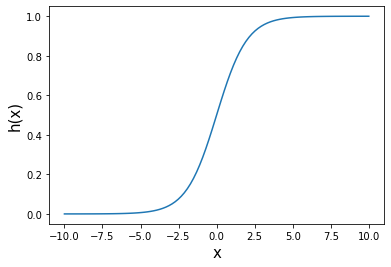

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.figure(figsize=(6,4))
plt.plot(x, z)
plt.xlabel("x", fontsize = 15)
plt.ylabel("h(x)", fontsize = 15)
plt.savefig('logistic-function.eps')
plt.show()

# Introduction

Let's suppose we have data on the distribution of credit card purchases, where certain transactions indicate fraud. Given this information, a fundamental question arises: What is the best model to fit these data?

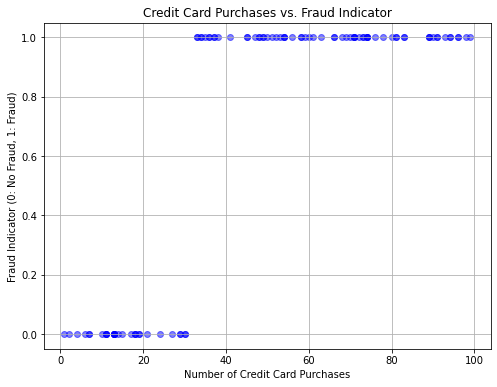

In [ ]:
# Generating random data for the number of credit card purchases
num_purchases = np.random.randint(0, 100, 100)

# Assigning fraud values based on the number of purchases
fraud = np.where(num_purchases > 30, 1, 0)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(num_purchases, fraud, color='b', alpha=0.5)
plt.xlabel("Number of Credit Card Purchases")
plt.ylabel("Fraud Indicator (0: No Fraud, 1: Fraud)")
plt.title("Credit Card Purchases vs. Fraud Indicator")
plt.grid(True)
plt.show()


Note that it's possible to obtain numerous models for describing the data distribution. The key question arising from this fact is: What is the best model to describe the behavior of these data?

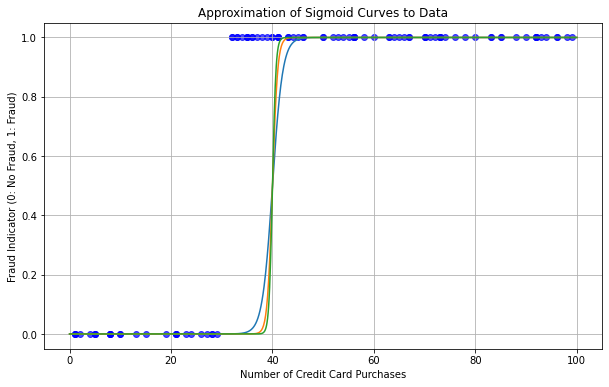

In [ ]:
# Generating random data for the number of credit card purchases
num_purchases = np.random.randint(0, 100, 100)

# Assigning fraud values based on the number of purchases
fraud = np.where(num_purchases > 30, 1, 0)

# Defining sigmoid function
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

# Defining different parameters for sigmoid curves
params = [1, 2, 3]

# Plotting the data and different sigmoid curves
plt.figure(figsize=(10, 6))

# Plotting the data
plt.scatter(num_purchases, fraud, color='b', alpha=0.7, label='Data')

# Plotting different sigmoid curves
x_values = np.linspace(0, 100, 1000)
for param in params:
    y_values = sigmoid(param * (x_values - 40))  # Offsetting the value of 40 to center the curve around the cutoff point
    plt.plot(x_values, y_values, label=f'Param = {param}')

plt.xlabel("Number of Credit Card Purchases")
plt.ylabel("Fraud Indicator (0: No Fraud, 1: Fraud)")
plt.title("Approximation of Sigmoid Curves to Data")
plt.grid(True)
plt.show()

The question we will answer.

### Linear Regression Model

If we consider the output $y$ to be an integer value, we can use the linear regression model:

$$y = \theta_{0}+\theta_1x_{1}+\theta_{2}x_2+\cdots+\theta_{n}x_{n}=\theta^{T}x,$$

where $\theta^{T}=(1, \theta_1, \theta_2, \ldots, \theta_n)$, to perform data classification.

Let's define the probabilities for the case of two classes:

$$\left\{
\begin{array}{ll}
p(y=0|x) \\
p(y=1|x)
\end{array}
\right.$$

Using the logistic function, we have:

$$p(y=1|x)=\frac{1}{1+e^{-\theta^Tx}}$$
and
$$p(y=0|x)=1-p(y=1|x)=\frac{1}{1+e^{\theta^{T}x}}.$$


* The "learning" of the model boils down to estimating the parameter vector $\theta$. This method is called logistic regression.

* To estimate the parameters of the model, we will use the training set $\mathcal{T} = \{(x_{i}, y_{i})\}_{i=1}^{N}$.

-----

The estimation of parameters in logistic regression models is generally performed using the method of maximum likelihood. Maximum likelihood estimators are those that maximize the likelihood function. Under the assumption of independence of the $y_{i}$ the likelihood function is given by
$$\mathcal{L}(\theta) = \prod_{i=1}^{N}p^{y_{i}}(1-p)^{1-y_{i}}.$$


Using maximum likelihood estimation, we have that
$$\theta = \text{arg max}_{\theta}p(y|x; \theta).$$

Thus, assuming independence among the data, the maximum likelihood

\begin{align*}
\mathcal{L}(\theta) &= \prod_{i=1}^{N}p^{y_{i}}(1-p)^{1-y_{i}}\\
&= p(y|x; \theta) \\
&= \prod_{i=1}^{N} p(y_{i}|x_{i}; \theta) \\
&= \prod_{i=1}^{N} p(y=1|x_{i}; \theta) \prod_{i=1}^{N} p(y=0|x_{i}; \theta) \\
&= \prod_{i=1}^{N} \frac{1}{1+e^{-\theta^Tx}} \prod_{i=1}^{N} \frac{1}{1+e^{\theta^{T}x}}
\end{align*}

Applying the logarithmic function to the expression above, we have
$$\log \mathcal{L}(\theta) = \sum_{i=1}^{N} y_{i} \log \left( \frac{1}{1+e^{-\theta^T x}} \right) + (1-y_{i})\log \left( \frac{1}{1+e^{\theta^T x}} \right).$$

The function $$\sum_{i=1}^{N} y_{i} \log \left( \frac{1}{1+e^{-\theta^T x}} \right) + (1-y_{i})\log \left( \frac{1}{1+e^{\theta^T x}} \right)$$ is called the cost function and $-\log \mathcal{L}(\theta)$ is the loss function.

Note that, we can maximize the likelihood by minimizing the cost function. Indeed,
\begin{align*}
\log \mathcal{L}(\theta) &= \sum_{i=1}^{N} \left( \log e^{\theta^{T}x} - \log(1+e^{\theta^{T}x}) \right) + \sum_{i=1}^{N} \left( \log 1 - \log(1+e^{\theta^{T}x}) \right)\\
&= \sum_{i=1}^{N}\theta^{T}x-\log(1+e^{\theta^{T}x})-\sum_{i=1}^{N}\log(1+e^{\theta^{T}x}).
\end{align*}

Let's maximize the expression above, that is, find $\theta$ that makes the function achieve its maximum value. Indeed, by taking the derivative with respect to $\theta$, we obtain
\begin{align}
\frac{\partial}{\partial\theta}\log \mathcal{L}(\theta) &= \sum_{i=1}^{N} \Big(x_{i}-\frac{1}{1+e^{\theta^{T}x}}x_{i}e^{\theta^{T}x_{i}}\Big) - \sum_{i=1}^{N} \frac{1}{1+e^{\theta^{T}x_{i}}}x_{i}e^{\theta^{T}x_{i}}\\
&= \sum_{i=1}^{N} x_{i} \Big(y_{i}-\frac{e^{\theta^{T}x_{i}}}{1+e^{\theta^{T}x_{i}}}\Big)
\end{align}

To find $\theta$ such that
$$\sum_{i=1}^{N} x_{i} \Big(y_{i}-\frac{e^{\theta^{T}x_{i}}}{1+e^{\theta^{T}x_{i}}}\Big)=0$$
one needs to employ the numerical Newton-Raphson method. Since this equation is nonlinear, determining the parameter $\theta$ analytically becomes difficult.

We determine the model parameters and proceed to classify into one of the two classes.

The decision boundary can be calculated using:
$$p(y=1|x) = p(y=0|x),$$
that is,
$$\theta^{T}x = 0.$$


The solutions are hyperplanes. Therefore, the separating surfaces are linear hyperplanes.

### Remark:
* Logistic regression is a special case of neural networks (1 neuron);
* It makes no assumptions about the distribution of classes in the feature space;
* It can be easily generalized to multiple classes;
* It is quite fast in predicting the dataset;
* The coefficients can be used to determine the importance of the attributes;
* If there is little data and many attributes, it can lead to overfitting;
* The separation surfaces are linear.

# Practical Application of Logistic Regression Model

Let's perform classification on an artificial dataset. We will examine the model fit for artificial data in this example. Note that the logistic regression function fits the dataset better than a simple linear regression.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


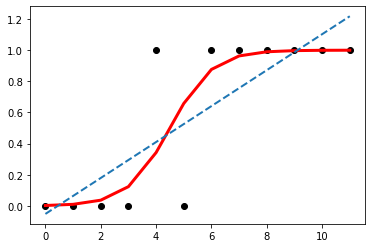

Accuracy Logistic Regression Model: 0.83
Accuracy Linear Regression Model: 0.65


In [ ]:
from sklearn import linear_model
from scipy.special import expit

X = np.arange(12).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])
plt.plot(X, y, "ko")

# Fit the logistic regression model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)
loss = expit(X * model.coef_ + model.intercept_).ravel()
plt.plot(X, loss, color="red", linewidth=3)


# Fit a linear regression model
linear = linear_model.LinearRegression()
linear.fit(X, y)
plt.plot(X, linear.coef_ * X + linear.intercept_, linewidth=2, linestyle="dashed")
plt.savefig("logistic.eps")
plt.show(True)

print("Accuracy Logistic Regression Model:", model.score(X, y).round(2))
print("Accuracy Linear Regression Model:", linear.score(X, y).round(2))

Let's perform a more in-depth practical example using the logistic regression model.

### Data Classification  Using Logistic Regression Model

In [ ]:
# importing the libraries
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

Splitting the dataset into training and test sets and normalizing the data.

In [ ]:
# Split the dataset into training and test sets using the hold-out method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Normalizing data is important in logistic regression for several reasons:

1. **Convergence Speed**: Gradient-based optimization algorithms, like those used in logistic regression, converge faster when the features are on a similar scale. When features have vastly different ranges, the cost function can have a highly irregular shape, making optimization slower and more difficult.

2. **Coefficient Interpretation**: When data is normalized, the coefficients learned by the model are easier to interpret. Each coefficient represents the change in the log-odds of the outcome for a one-unit change in the predictor variable. Without normalization, coefficients can be skewed by the different scales of the predictors.

3. **Avoiding Numerical Issues**: Logistic regression involves the computation of exponentials and divisions. If features have very large values, this can lead to numerical instability and overflow issues. Normalizing the features mitigates these risks.

4. **Improved Accuracy**: Normalization can sometimes improve the accuracy of the model by ensuring that all features contribute equally to the prediction, preventing features with larger scales from dominating the model.

In summary, normalizing data helps in achieving faster convergence, better model interpretability, numerical stability, and potentially improved accuracy.

### Initialize and Train the Logistic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model's Performance

Accuracy: 98.25%


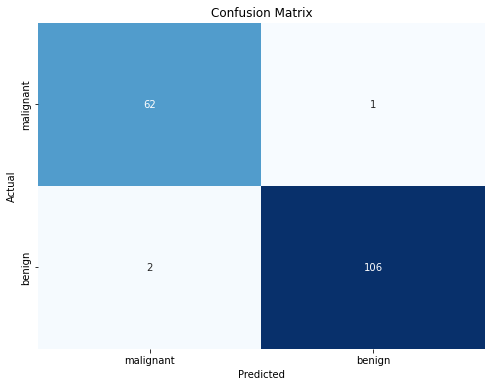

In [ ]:
# Predict the classes on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Decision Boundary

The separation surface of logistic regression is a visual representation that highlights the boundary dividing the classes of a dataset in a two-dimensional or three-dimensional space. This boundary is defined by the estimated probability of belonging to a specific class, which is modeled by the logistic function.

For example, in a spam email classification problem, the separation surface can illustrate how the keywords and characteristics of emails influence the classification decision between "spam" and "non-spam". It typically appears as a line, curve, or plane that separates the regions where examples of one class are more likely to be found from those where examples of the other class are more likely.

Understanding the separation surface is crucial for interpreting and evaluating the performance of a logistic regression model, as it helps visualize how the model is dividing the feature space to make its classification decisions.

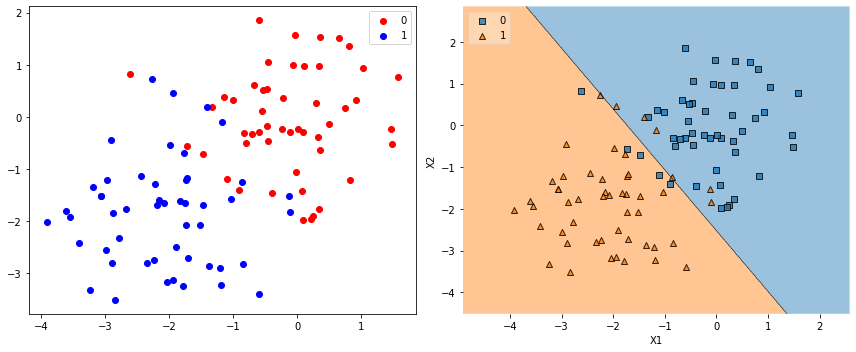

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs

# Generate data in two dimensions
n_samples = 100  # number of observations
centers = [(0, 0), (-2, -2)]  # centers of the clusters
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0, centers=centers,
                  shuffle=False, random_state=42)

# Convert data to DataFrame format
data = pd.DataFrame(data=np.column_stack((X, np.transpose(y))), columns=["X1", "X2", "y"])

# Show the data and color it according to classes
colors = ["red", "blue"]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for label in np.unique(y):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], color=colors[label], label=label)
plt.legend()

# Train a logistic regression classifier
model = LogisticRegression(solver="lbfgs", multi_class="auto", max_iter=1000)
model.fit(X, y)

# Plot decision regions
plt.subplot(1, 2, 2)
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()


Let's visualize an example of decision boundaries for 3 classes.

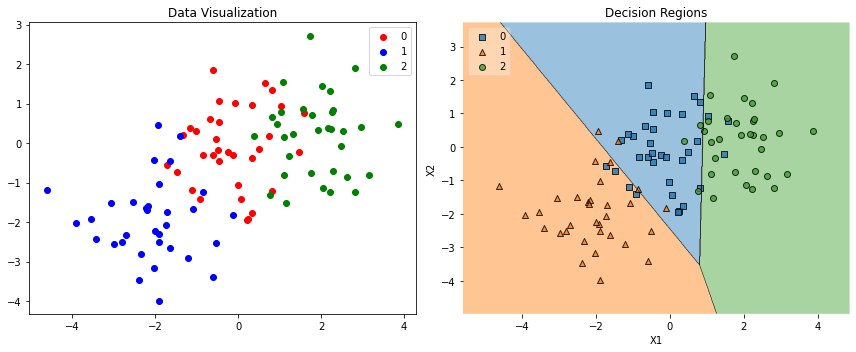

In [ ]:
# Generate data in two dimensions
n_samples = 100  # number of observations
centers = [(0, 0), (-2, -2), (2, 0)]
X, y = make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers,
                  shuffle=False, random_state=42)

# Convert data to DataFrame format
data = pd.DataFrame(data=np.column_stack((X, np.transpose(y))), columns=["X1", "X2", "y"])
features_names = ["X1", "X2"]
class_labels = np.unique(y)

# Show the data and color it according to classes
colors = ["red", "blue", "green", "black"]

# Training a classifier
model = LogisticRegression(solver="lbfgs", multi_class="auto", max_iter=1000)
model.fit(X, y)

# Plotting decision regions
plt.figure(figsize=(12, 5))  # Create a larger figure to display plots side by side
plt.subplot(1, 2, 1)  # Subplot for data visualization

for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind, 0][0], X[ind, 1][0], color=colors[c], label=c)
plt.legend()
plt.title("Data Visualization")

plt.subplot(1, 2, 2)  # Subplot for decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Regions")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Reference

1. Moore, D. S., McCabe, G. P., & Craig, B. A. (2019). *Introduction to the Practice of Statistics*. W. H. Freeman.

2. Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. Springer.

3. Casella, G., & Berger, R. L. (2002). *Statistical Inference*. Duxbury Press.

4. Hosmer Jr, D. W., Lemeshow, S., \& Sturdivant, R. X. (2013). *Applied Logistic Regression*. John Wiley \& Sons.

5. Gelman, A., Hill, J., \& Yajima, M. (2012). *Data Analysis Using Regression and Multilevel/Hierarchical Models*. Cambridge University Press.

6. Casella, G., \& Berger, R. L. (2002). *Statistical Inference*. Duxbury Press.

7.  Burden, R. L., \& Faires, J. D. (2015). *Numerical Analysis*. Cengage Learning.